In [1]:
%matplotlib inline

import spiceypy
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

spiceypy.furnsh('/Users/mcosta/ROSETTA/kernels/mk/ROS_OPS_LOCAL.TM')

In [2]:
et = spiceypy.utc2et('2016-02-04T11:32:52.304')

sensor_name = 'ROS_NAVCAM-A'

sensor_id = spiceypy.bodn2c(sensor_name)
(shape, frame, bsight, vectors, bounds) = spiceypy.getfov(sensor_id, 100)

print(vectors, bounds)

4 [[  6.64563741   6.64563741 152.21012124]
 [ -6.64563741   6.64563741 152.21012124]
 [ -6.64563741  -6.64563741 152.21012124]
 [  6.64563741  -6.64563741 152.21012124]]


In [3]:
nx, ny = (1024, 1024)
x = np.linspace(bounds[0][0], bounds[2][0], nx)
y = np.linspace(bounds[0][1], bounds[2][1], ny)
xv, yv = np.meshgrid(x, y)

phase_matrix = np.zeros((1024, 1024))
emissn_matrix = np.zeros((1024, 1024))
solar_matrix = np.zeros((1024, 1024))
libsight = []
for i, x in enumerate(xv):
    for j, y in enumerate(yv):
        ibsight = [x[i], y[j], bsight[2]]
        libsight.append(ibsight)
        try:
            (spoint, trgepc, srfvec ) = spiceypy.sincpt('ELLIPSOID', 'EARTH', et, 'IAU_EARTH', 'NONE', 'ROSETTA', frame, ibsight)
            (trgepc, srfvec, phase, solar, emissn) = spiceypy.ilumin('ELLIPSOID', 'EARTH', et, 'IAU_EARTH', 'NONE', 'ROSETTA', spoint)
            emissn_matrix[i,j] = emissn
            phase_matrix[i,j] = phase
            solar_matrix[i,j] = solar
        except:
            pass
            emissn_matrix[i,j] = 0
            phase_matrix[i,j] = math.pi
            solar_matrix[i,j] = 0

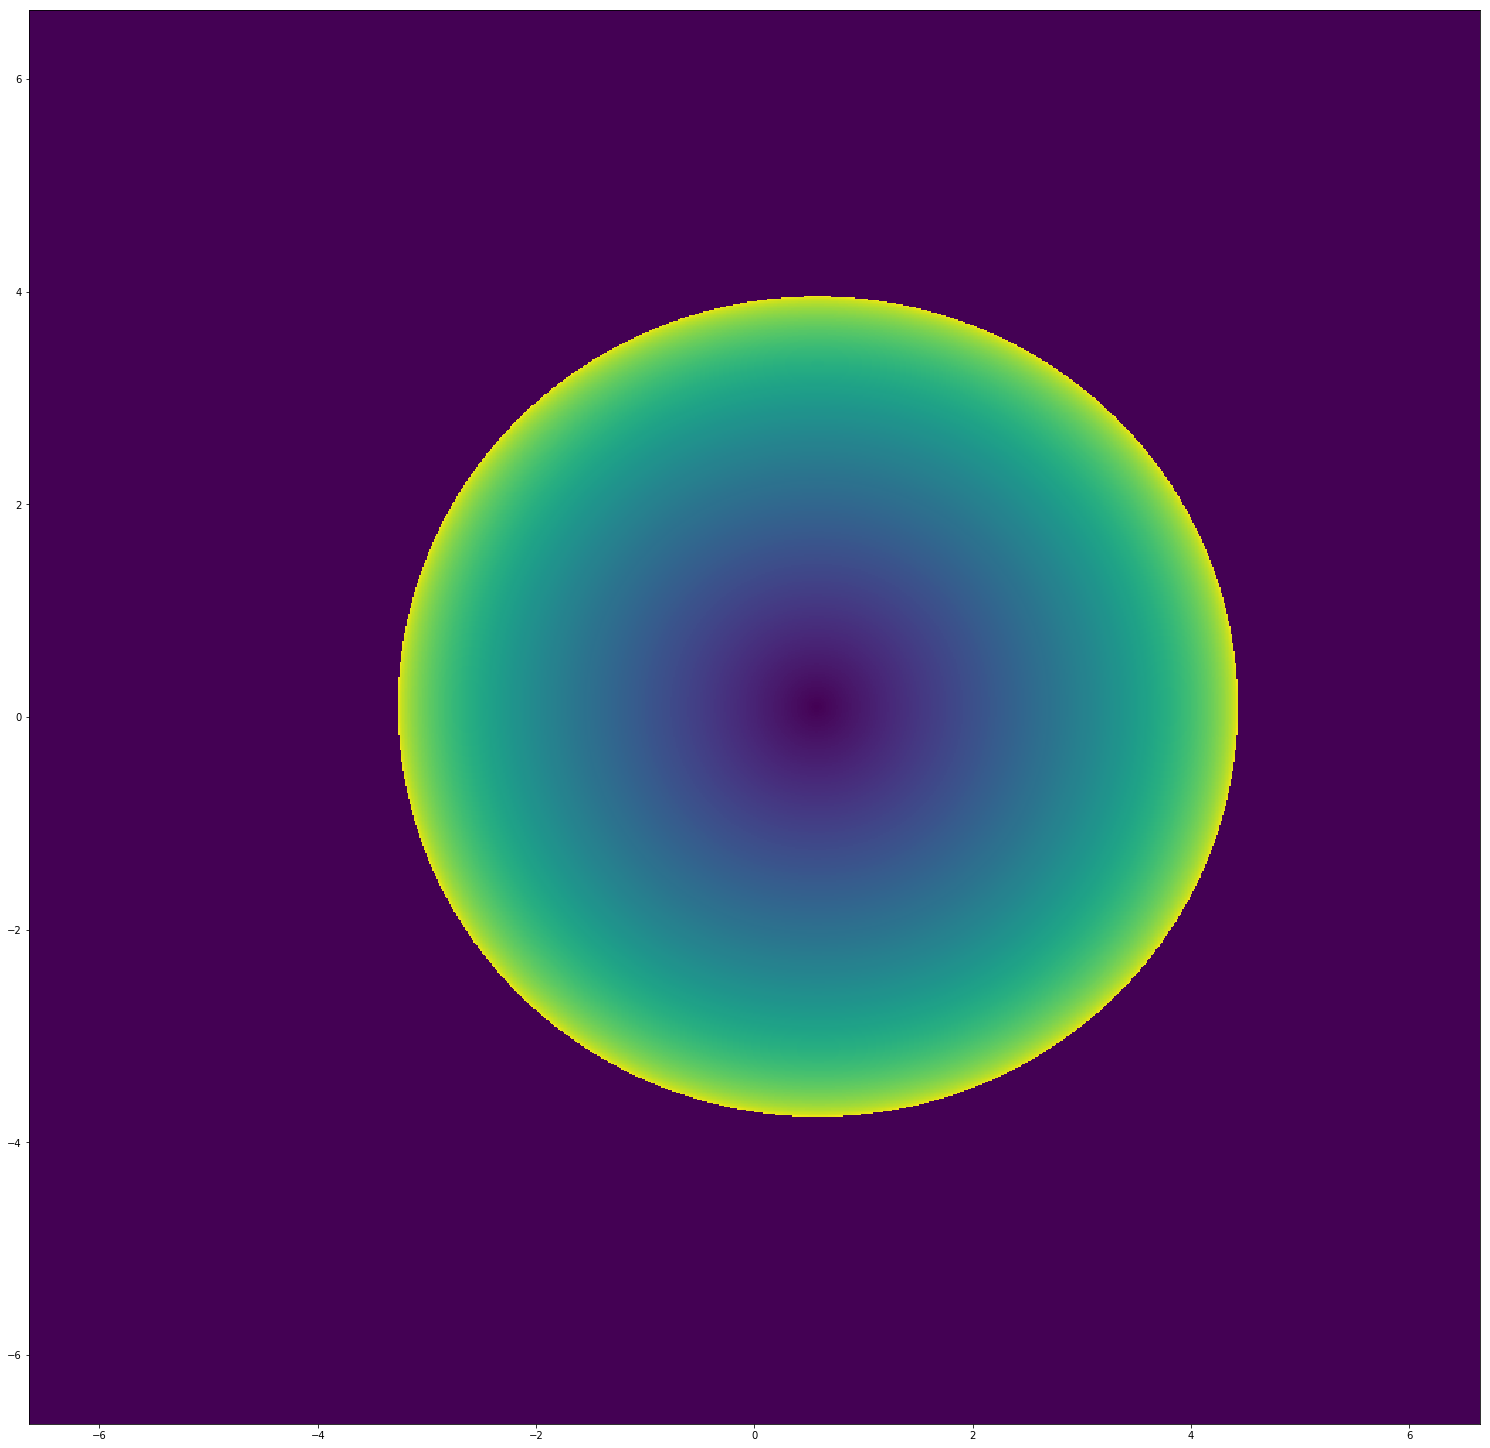

In [4]:
mpl.rcParams['figure.figsize'] = (26.0, 26.0)
plt.pcolor(xv, yv, emissn_matrix)

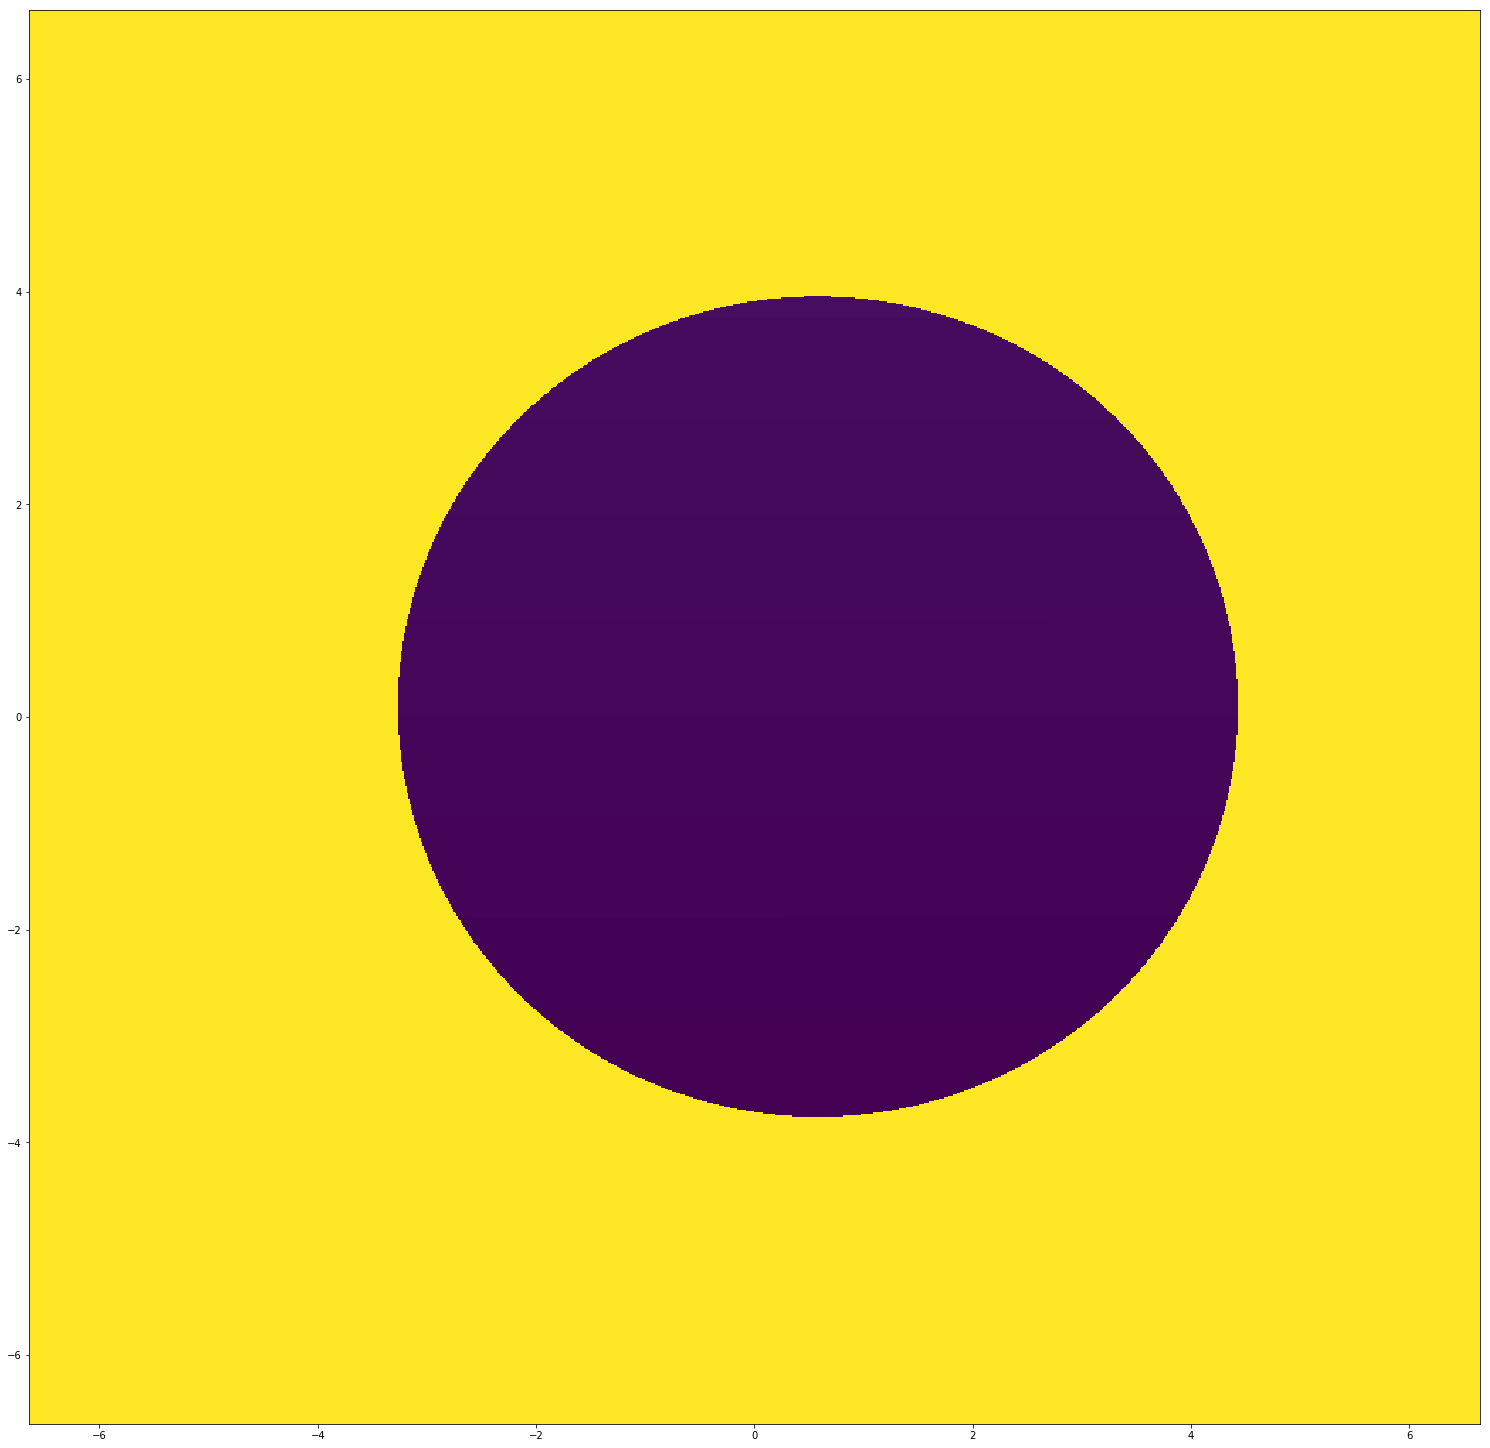

In [5]:
plt.pcolor(xv, yv, phase_matrix)

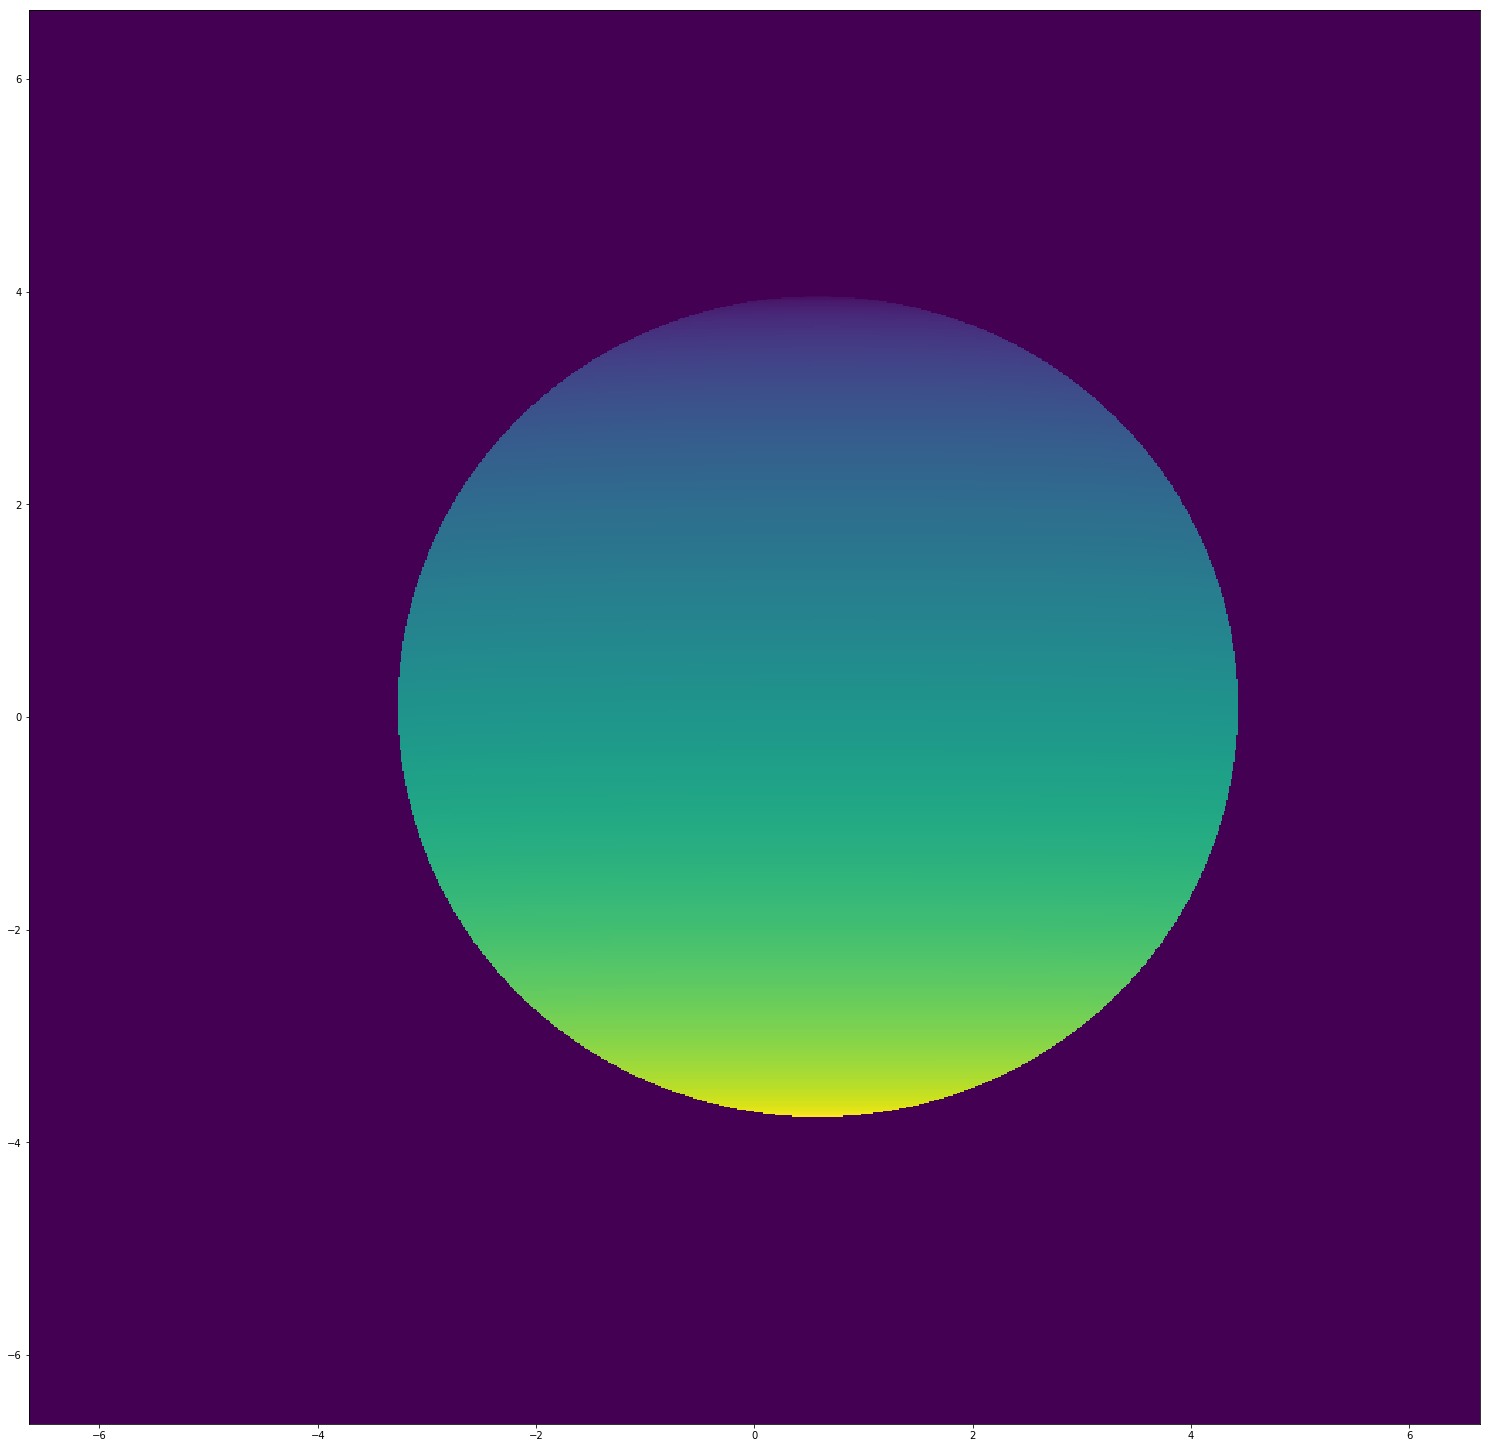

In [6]:
plt.pcolor(xv, yv, solar_matrix)

![title](img/ROS_CAM1_20050305T124502.JPG)